<a href="https://colab.research.google.com/github/NeginKhalifat/TensorFlow_PracticeNotes/blob/main/5_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

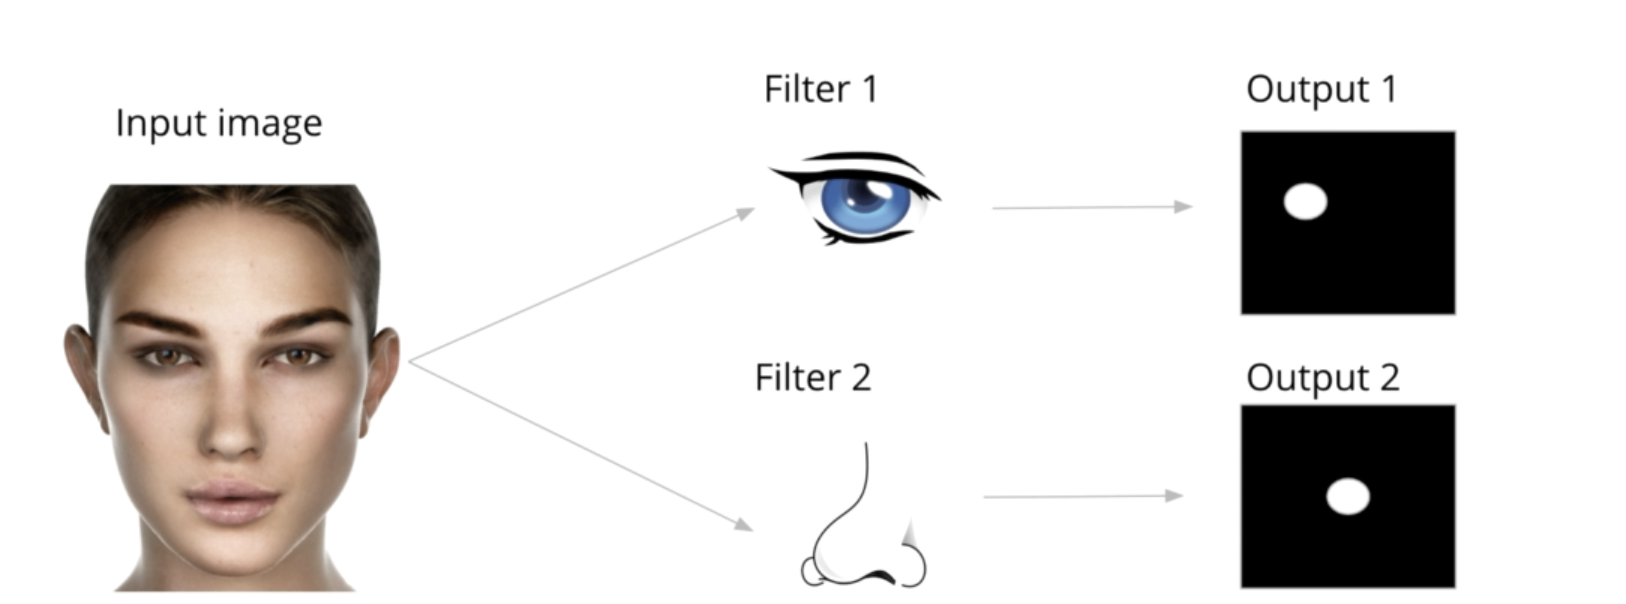

# in covolution we have input, filter, output
convolution is **pattern finder**

we use matrix multiplication instead of convolution.


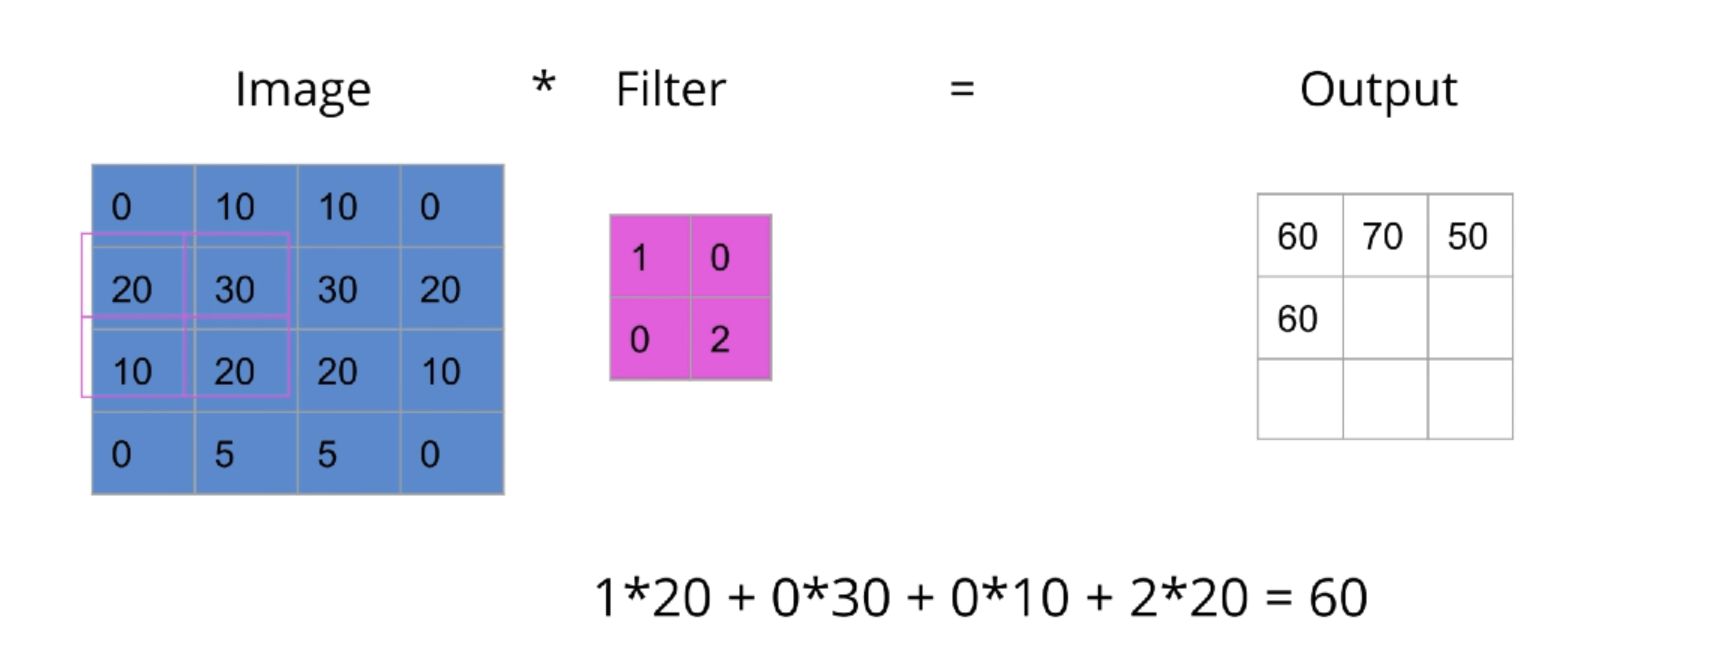

# Here all modes that we use in creating a model

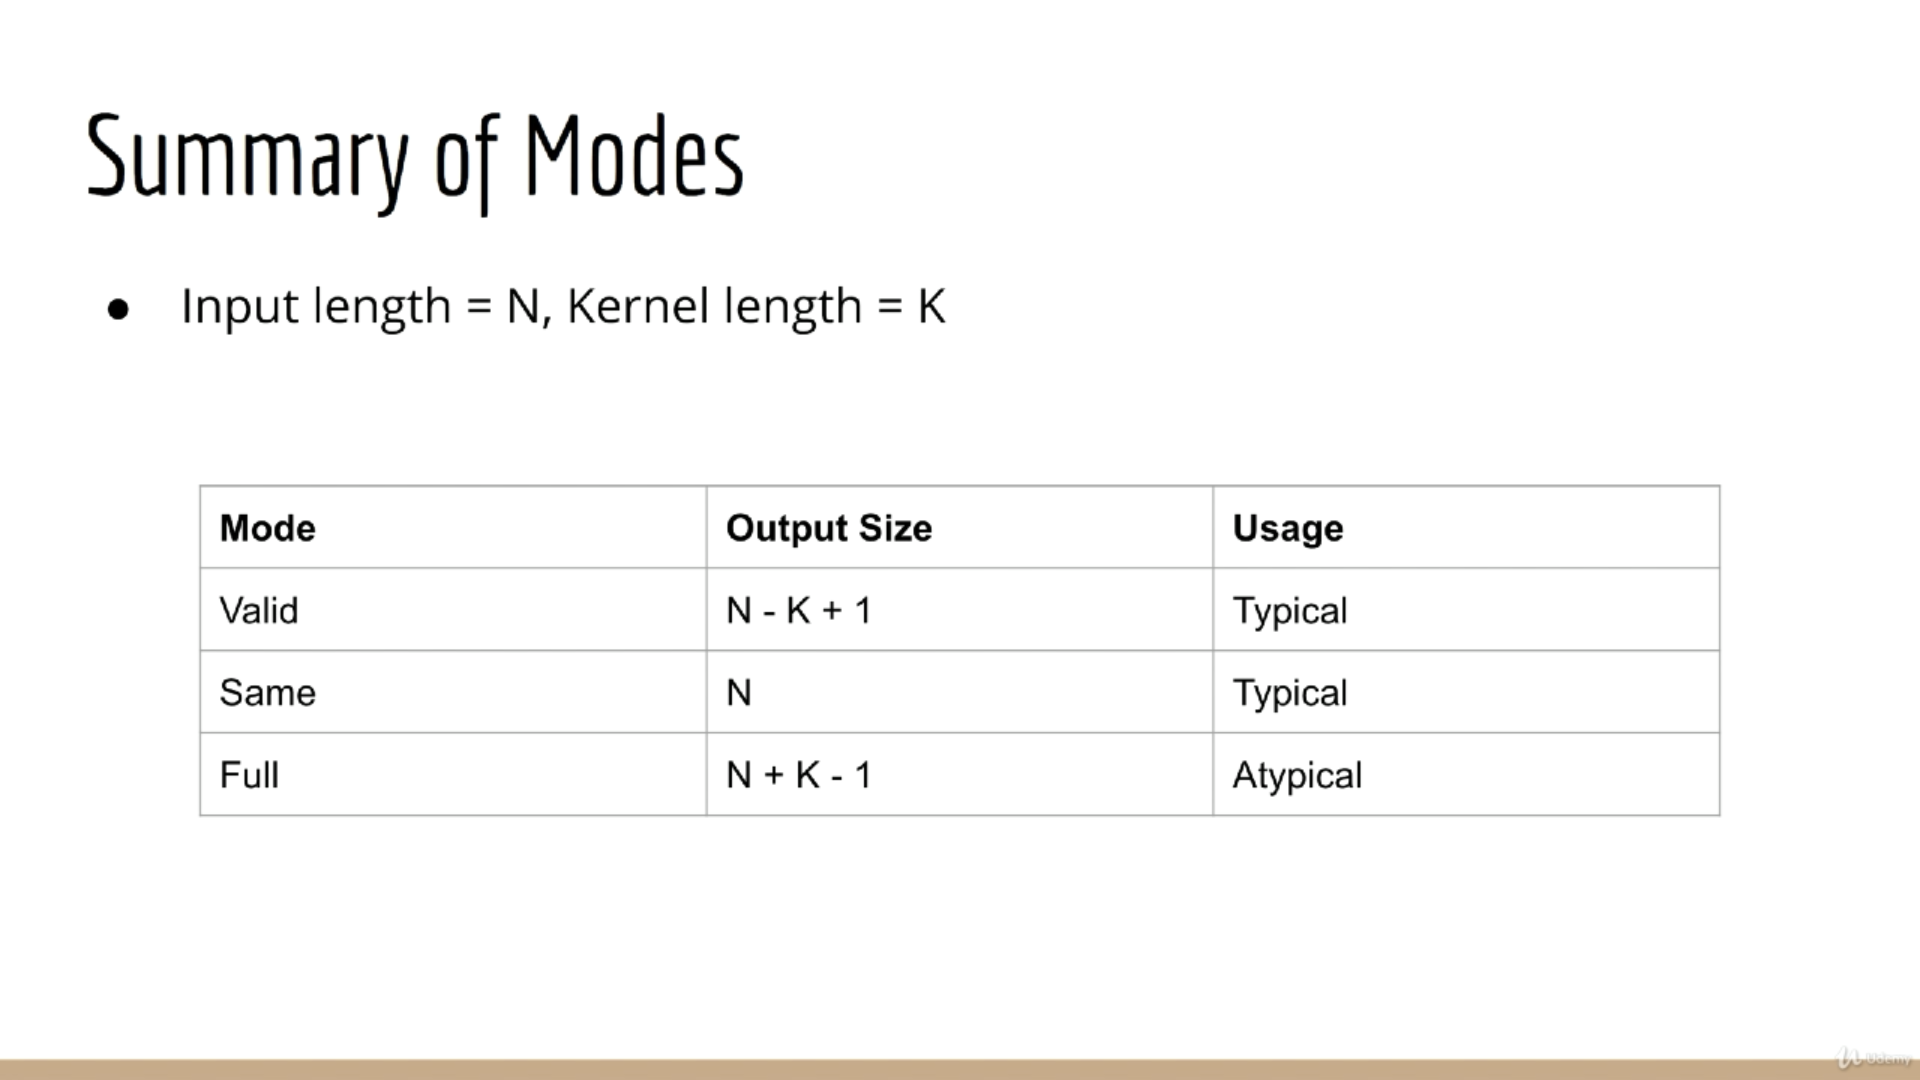

# Fashion MNIST

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Input,Conv2D,Flatten,Dropout
import numpy as np
from tensorflow.keras.models import Model

In [22]:
fasion_mnist = tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test)=fasion_mnist.load_data()
X_train = X_train/255.0
X_test = X_test /255.0
print(X_train.shape)
y_train

(60000, 28, 28)


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Show Random Image

Text(0.5, 1.0, 'actual_data: 2')

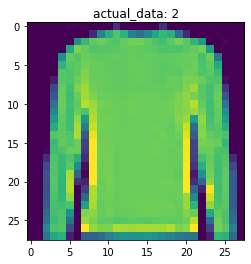

In [23]:
i = np.random.choice(len(X_test))
plt.imshow(X_test[i],cmap=None)
plt.title("actual_data: %s"%(y_test[i]))

input of covolution must be => N H W C  
we have to convert (60000, 28, 28) to (60000, 28, 28,1)
add dimention:

In [24]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)
X_train.shape

(60000, 28, 28, 1)

In [27]:
K = len(set(y_train))
X_train[0].shape

(28, 28, 1)

Build the Model using the functional API

In [29]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dense(512,activation='relu')(x)
x = Dropout(.2)(x)
x = Dense(K,activation='softmax')(x)
 
model = Model(i,x)


In [30]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [31]:
r = model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test))

Epoch 1/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.6763 - accuracy: 0.7517 - val_loss: 0.3873 - val_accuracy: 0.8550
Epoch 2/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3567 - accuracy: 0.8665 - val_loss: 0.3437 - val_accuracy: 0.8740
Epoch 3/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3014 - accuracy: 0.8878 - val_loss: 0.3315 - val_accuracy: 0.8800
Epoch 4/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2590 - accuracy: 0.9028 - val_loss: 0.3141 - val_accuracy: 0.8848
Epoch 5/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2205 - accuracy: 0.9148 - val_loss: 0.2991 - val_accuracy: 0.8942
Epoch 6/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1904 - accuracy: 0.9276 - val_loss: 0.3082 - val_accuracy: 0.8933
Epoch 7/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1672 - accuracy: 0.9356 - val_loss: 0.3164 -

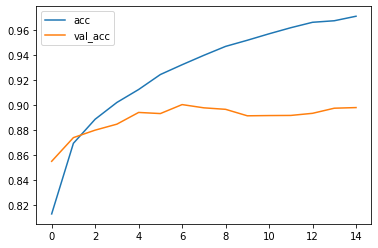

In [32]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

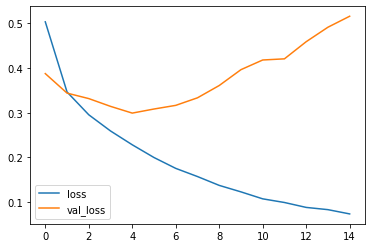

In [41]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

# Plot Confusion Matrix

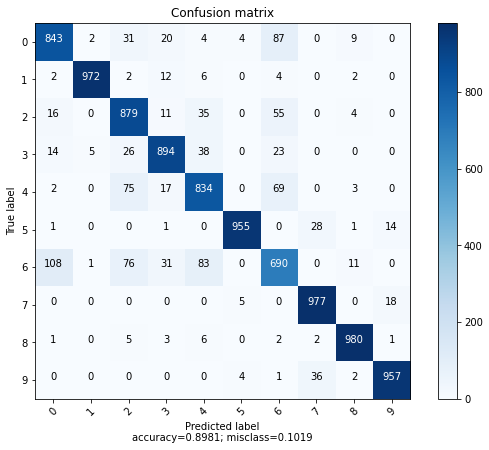

In [33]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
 
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
from sklearn.metrics import  confusion_matrix
y_pred=model.predict(X_test).argmax(axis=1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred), list(range(10)))

# Misclassifications

Text(0.5, 1.0, 'actual_data: Ankle boot, Predict: Sneaker')

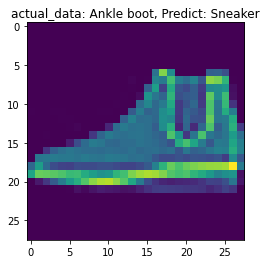

In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
misclassified_idx=np.where(y_pred!=y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28),cmap=None)
plt.title("actual_data: %s, Predict: %s"%(class_names[y_test[i]],class_names[ y_pred[i]]))